In [3]:
from cycler import cycler
from gather_averages_2_2 import gather_averages
import matplotlib.pyplot as plt

In [4]:
# Extract data
inputdir="/home/flo/Documents/eth-asl-final-experiment-data/exp2/2_2_baseline_twoservers_2017-11-16_091826"
all_reps_extracted = gather_averages(inputdir)
all_reps=all_reps_extracted.reset_index()

Input directory is " /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_2_baseline_twoservers_2017-11-16_091826
Workload is " writeOnly
Processing directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_2_baseline_twoservers_2017-11-16_091826/writeOnly_256vc
    Repetition 1
    Rep directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_2_baseline_twoservers_2017-11-16_091826/writeOnly_256vc/1
    Repetition 2
    Rep directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_2_baseline_twoservers_2017-11-16_091826/writeOnly_256vc/2
    Repetition 3
    Rep directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_2_baseline_twoservers_2017-11-16_091826/writeOnly_256vc/3
Processing directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_2_baseline_twoservers_2017-11-16_091826/writeOnly_4vc
    Repetition 1
    Rep directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_2_baseline_twoservers_2017-11-16_091826/writeOnly_

    Repetition 2
    Rep directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_2_baseline_twoservers_2017-11-16_091826/readOnly_512vc/2
    Repetition 3
    Rep directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_2_baseline_twoservers_2017-11-16_091826/readOnly_512vc/3
Processing directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_2_baseline_twoservers_2017-11-16_091826/readOnly_1vc
    Repetition 1
    Rep directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_2_baseline_twoservers_2017-11-16_091826/readOnly_1vc/1
    Repetition 2
    Rep directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_2_baseline_twoservers_2017-11-16_091826/readOnly_1vc/2
    Repetition 3
    Rep directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_2_baseline_twoservers_2017-11-16_091826/readOnly_1vc/3
Processing directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_2_baseline_twoservers_2017-11-16_091826/readOnly_16v

In [5]:
# Group by and calculate AVG and MEAN
averages = all_reps.groupby(['num_clients', 'workload'], as_index=True).agg(
                      {'sum_throughput':['mean','std'],'avg_responsetime':['mean','std']})
avg = averages.reset_index()

In [6]:
# Calculate throughput and responsetime using interactive responsetime laws
avg['interact_responsetime_mean'] = avg['num_clients']/avg[('sum_throughput', 'mean')]*1000
avg['interact_throughput_mean'] = avg['num_clients']/avg[('avg_responsetime', 'mean')]*1000

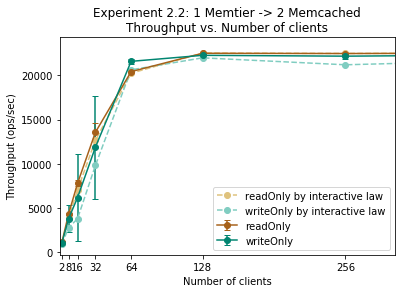

In [7]:
# 2.1 Throughput graph
fig, ax = plt.subplots()
#ax.set_ylim([0,30000])
ax.set_xlim([0, 300])
ax.set_prop_cycle(cycler('color',['#a6611a','#dfc27d', '#018571', '#80cdc1']))
for key, grp in avg.groupby(['workload']):
    ax.errorbar(grp['num_clients'], grp[('sum_throughput', 'mean')], yerr=2*grp[('sum_throughput', 'std')], label=key,  marker='o', capsize=3)
    ax.plot(grp['num_clients'], grp['interact_throughput_mean'], label=key + " by interactive law",  marker='o', linestyle='--')
    plt.xticks(grp['num_clients'].head(7))
ax.legend(loc="lower right")
ax.set_title("Experiment 2.2: 1 Memtier -> 2 Memcached\nThroughput vs. Number of clients")
ax.set_xlabel("Number of clients")
ax.set_ylabel("Throughput (ops/sec)")

plt.show()
fig.savefig('exp2_2_throughput.png', dpi=300)

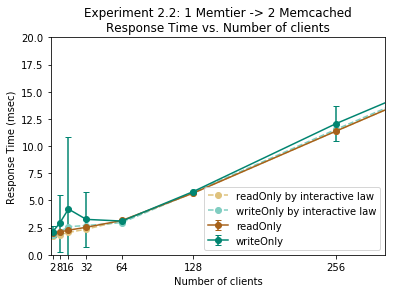

In [8]:
# 2.1 Responsetime graph
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_xlim([0, 300])
ax.set_prop_cycle(cycler('color',['#a6611a','#dfc27d', '#018571', '#80cdc1']))
for key, grp in avg.groupby(['workload']):
    ax.errorbar(grp['num_clients'], grp[('avg_responsetime', 'mean')], yerr=2*grp[('avg_responsetime', 'std')], label=key,  marker='o', capsize=3)
    ax.plot(grp['num_clients'], grp['interact_responsetime_mean'], label=key + " by interactive law",  marker='o', linestyle='--')
    plt.xticks(grp['num_clients'].head(7))
ax.legend(loc="lower right")
ax.set_title("Experiment 2.2: 1 Memtier -> 2 Memcached\nResponse Time vs. Number of clients")
ax.set_xlabel("Number of clients")
ax.set_ylabel("Response Time (msec)")
plt.show()
fig.savefig('exp2_2_responsetime.png', dpi=300)

In [9]:
avg

num_clients   workload sum_throughput              avg_responsetime  \
                                    mean          std             mean   
0            2   readOnly    1148.163148    33.759848         1.978865   
1            2  writeOnly    1071.736943   121.745800         2.137705   
2            8   readOnly    4345.867514    39.281606         2.094839   
3            8  writeOnly    3811.281609   740.633608         2.883305   
4           16   readOnly    7797.179159   180.406609         2.265133   
5           16  writeOnly    6185.982759  2459.469870         4.209368   
6           32   readOnly   13567.862069   496.674071         2.528937   
7           32  writeOnly   11880.428833  2901.484540         3.258109   
8           64   readOnly   20427.567554    68.782151         3.160781   
9           64  writeOnly   21590.183908   139.440748         3.102471   
10         128   readOnly   22502.839080    11.718715         5.682471   
11         128  writeOnly   22270.386276     1.690185         5.822110   
12         256   readOnly   22473.809957    38.311916        11.386253   
13         256  writeOnly   22174.872958   132.808069        12.075850   
14         512   readOnly   22553.550458     8.091729        22.699034   
15         512  writeOnly   22405.457032   389.309711        23.208370   
16        1024   readOnly   22410.763158    18.337792        45.699310   
17        1024  writeOnly   22162.625244     8.525471        46.593693   

             interact_responsetime_mean interact_throughput_mean  
         std                                                      
0   0.033175                   1.741913              1010.680313  
1   0.235046                   1.866130               935.582992  
2   0.037633                   1.840829              3818.908903  
3   1.311537                   2.099031              2774.594126  
4   0.039178                   2.052024              7063.602550  
5   3.290792                   2.586493              3801.045834  
6   0.066061                   2.358515             12653.538923  
7   1.255839                   2.693505              9821.647660  
8   0.013522                   3.133021             20248.160805  
9   0.015829                   2.964310             20628.716448  
10  0.002671                   5.688171             22525.410872  
11  0.003633                   5.747543             21985.156273  
12  0.021596                  11.391037             22483.253364  
13  0.783253                  11.544598             21199.335918  
14  0.011940                  22.701525             22556.025763  
15  0.288267                  22.851576             22061.006903  
16  0.065223                  45.692331             22407.340336  
17  0.137572                  46.203913             21977.223328